In [1]:
import speech_recognition as sr 
import pyttsx3
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
r = sr.Recognizer() 

In [3]:
def listen():
    with sr.Microphone() as source2:
        SpeakText("Speak now..")
        audio2 = r.record(source2, duration=5)
        SpeakText("Recognizing...")
        MyText = r.recognize_google(audio2) 
        MyText = MyText.lower()
        SpeakText("You said..."+MyText)
        SpeakText("Processing")
        return MyText


In [4]:
def new_background(nb):
    imgo = cv2.imread('salah.jfif')

    height, width = imgo.shape[:2]
    imgo = cv2.resize(imgo, (int(width*0.7),int(height*0.7)), interpolation = cv2.INTER_AREA) 
    imgo=cv2.cvtColor(imgo, cv2.COLOR_BGR2RGB)
    #nb = cv2.resize(nb,(imgo[0],imgo[1]))
    #Create a mask holder
    mask = np.zeros(imgo.shape[:2],np.uint8)

    #Grab Cut the object
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)

    #Hard Coding the Rect… The object must lie within this rect.
    rect = (10,10,width-30,height-30)
    cv2.grabCut(imgo,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
    mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    img1 = imgo*mask[:,:,np.newaxis]
    plt.imshow(img1)
    

    #Get the background
    background = imgo - img1

    #Change all pixels in the background that are not black to white
    background[np.where((background > [0,0,0]).all(axis = 2))] = nb[np.where((background > [0,0,0]).all(axis = 2))]
    background[np.where((background == [0,0,0]).all(axis = 2))] = imgo[np.where((background == [0,0,0]).all(axis = 2))]

    fig = plt.figure()
    fig.set_figwidth(18)
    a=fig.add_subplot(1, 2, 1)
    a.set_title('Original Image')
    plt.imshow(imgo)
    plt.axis('off')
    a=fig.add_subplot(1, 2, 2)
    a.set_title('Background Changed')
    plt.imshow(background)
    plt.axis('off')

In [5]:
def SpeakText(command): 
      
    # Initialize the engine 
    engine = pyttsx3.init() 
    engine.say(command)  
    engine.runAndWait() 

In [6]:
def Start():
    SpeakText("Welcome! this program changes background")
    text = listen()
    text=text+'.jpg'
    nb = cv2.imread(text)
    nb=cv2.cvtColor(nb, cv2.COLOR_BGR2RGB)
    plt.imshow(nb)
    new_background(nb)
    time.sleep(3)
    SpeakText("Thankyou, Task Completed")
    

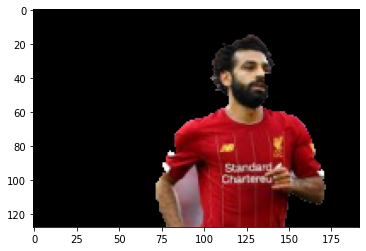

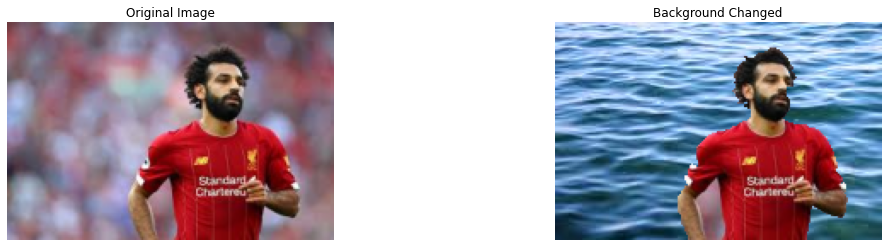

In [7]:
if __name__ == '__main__':
    Start()